In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import pycolmap
from pathlib import Path

### Gaussian Function
Gaussian is defined by a mean $\mu$ and, in case of 2D, by 2x2 covariance matrix 

In [2]:
white_data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=1000)

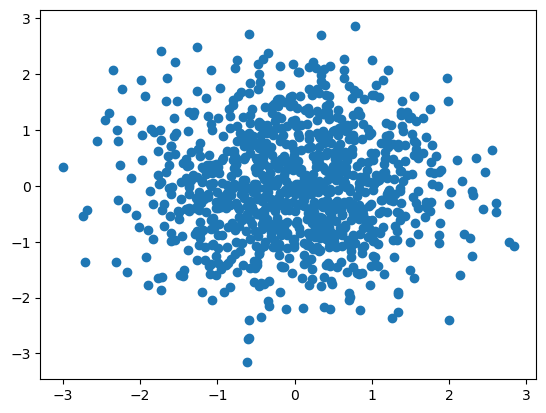

In [3]:
plt.scatter(white_data[:, 0], white_data[:, 1])

For eigenvectors and eigenvalues of a matrix $A$ it is true that 

$$A v = \lambda v$$

where $v$ is an eigenvector and $\lambda$ is a corresponding eigenvalue

In [99]:
cov = [[3, 2], [2, 3]]
eigenvalues, eigenvectors = np.linalg.eig(cov)

v = eigenvectors[:, 0]
lambd = eigenvalues[0]

lhs = cov @ v 
rhs = lambd * v

print(f"LHS = {lhs}")
print(f"RHS = {rhs}")
print(np.allclose(lhs, rhs))

LHS = [3.53553391 3.53553391]
RHS = [3.53553391 3.53553391]
True


If we have white data $D$ defined as above, then we can apply a transformation $T$ consisting of rotation $R$ and scaling $S$ ($T = RS$) to get new data $D'$. It relates covariance matrix as follows $$\Sigma = TIT^{T}$$ $$\Sigma = RS(RS)^{T}$$ $$\Sigma = RSS^TR^T$$

How does it relate to eigenvalues & eigenvectors?

$$\Sigma V = V L$$ where $V$ is a matrix of eigenvectors and $L$ is a diagonal matrix of eigenvalues

$$\Sigma = V L V^{-1}$$

It is the eigendecomposition of the covariance matrix, where $R = V$ and $S = \sqrt{L}$

In [116]:
cov = [[3, 2], [2, 3]]
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [117]:
eigenvalues

array([5., 1.])

In [118]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [139]:
R = eigenvectors
S = np.sqrt(np.diag(eigenvalues))
print(R)
print(S)
new_cov = R @ S @ S.T @ R.T
print(new_cov)
np.allclose(new_cov, cov) # same as original one

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[2.23606798 0.        ]
 [0.         1.        ]]
[[3. 2.]
 [2. 3.]]


True

In [140]:
U, M, V = LA.svd(cov)
M = np.sqrt(np.diag(M))

In [141]:
print(U)
print(M)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[2.23606798 0.        ]
 [0.         1.        ]]


In [142]:
np.allclose(new_cov, cov) # same as original one

True

In [148]:
transformed_data = white_data @ S @ R.T

In [149]:
transformed_data

array([[-0.09969276, -0.55294346],
       [-1.30224979,  0.83907974],
       [-1.26907552, -1.59213827],
       ...,
       [-1.26454412, -2.32570436],
       [ 1.08302514,  2.70585518],
       [ 0.66486841,  0.30719959]])

In [150]:
data = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=1000)

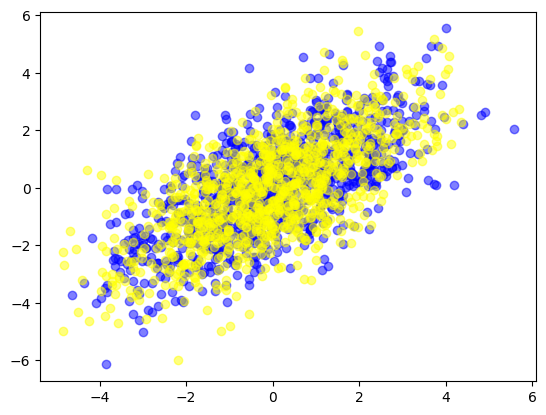

In [151]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5, color='blue')
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color='yellow')

### Projecting 3D Covariance onto 2D 

In [14]:
scene_folder = Path('../data/south-building')
images_folder = scene_folder / 'images'
database_path = scene_folder / 'database.db'

reconstruction = pycolmap.Reconstruction(scene_folder / '0')
camera = reconstruction.cameras[1]
img = reconstruction.images[1]
extrinsic_params = np.concatenate((img.cam_from_world.matrix(), np.array([[0, 0, 0, 1]])))
print(extrinsic_params)

[[ 0.46293486  0.25750281  0.84816485 -0.67305164]
 [-0.22869221  0.95917486 -0.16638349  0.96543814]
 [-0.85638262 -0.11694397  0.50292436  3.60088536]
 [ 0.          0.          0.          1.        ]]


In [17]:
viewing_transformation = extrinsic_params[:3, :3].T # LA.inv(extrinsic_params[:3, :3])
viewing_transformation

array([[ 0.46293486, -0.22869221, -0.85638262],
       [ 0.25750281,  0.95917486, -0.11694397],
       [ 0.84816485, -0.16638349,  0.50292436]])